In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('../datos/originales/mexico_exportaciones.csv')
df = df.drop(['Partida Aduanera', 'Descripcion Partida Aduanera', 'DUA','Ciudad Importador', 'Dirección Importador', 'Dirección Exportador', 'Ciudad Exportador', 'Estado Exportador', 'Regimen'], axis=1)
df['Year'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.year

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Aduana                 578 non-null    object 
 1   Fecha                  578 non-null    object 
 2   Cod. Tributario        578 non-null    object 
 3   Exportador             578 non-null    object 
 4   Importador             409 non-null    object 
 5   Qty 1                  578 non-null    float64
 6   Unid 1                 578 non-null    object 
 7   Qty 2                  578 non-null    float64
 8   Unid 2                 578 non-null    object 
 9   U$ FOB Tot             578 non-null    float64
 10  U$ FOB Unit 1          578 non-null    float64
 11  U$ FOB Unit 2          578 non-null    float64
 12  País Destino           578 non-null    object 
 13  Vía                    578 non-null    object 
 14  Descripción Comercial  578 non-null    object 
 15  Year  

In [2]:
tipopepino = df.groupby('Descripción Comercial')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(tipopepino)

                                 Descripción Comercial     Qty 1
116    PEPINO DE MAR ENTERO SECO (ISOSTICHOPUS FUSCUS)  96377.00
181  PEPINO DE MAR PRECOCIDO CONGELADO (ISOSTICHOPU...  56756.06
256                                    PEPINOS DE MAR.  50998.00
247  PEPINO DEMAR (HOLOTURIA PARAPRINCEPS SPP) PREC...  41430.00
162  PEPINO DE MAR NEGRO PRECOCIDO CONGELADO PARAST...  25485.00
..                                                 ...       ...
128  PEPINO DE MAR ISOSTICHOPUS FUSCUS SECO (14.27 ...     14.27
145  PEPINO DE MAR NEGRO (HOLOTHURIA SPP) SECO PARA...     14.00
92   PEPINO DE MAR COCIDO Y SALADAO (HOLOTHURIA KAF...      5.00
93   PEPINO DE MAR COCIDO Y SALADAO (PARASTICHOPUS ...      5.00
174                            PEPINO DE MAR PRECOCIDO      2.00

[271 rows x 2 columns]


(158, 16)


<Axes: xlabel='Year,Descripción Comercial'>

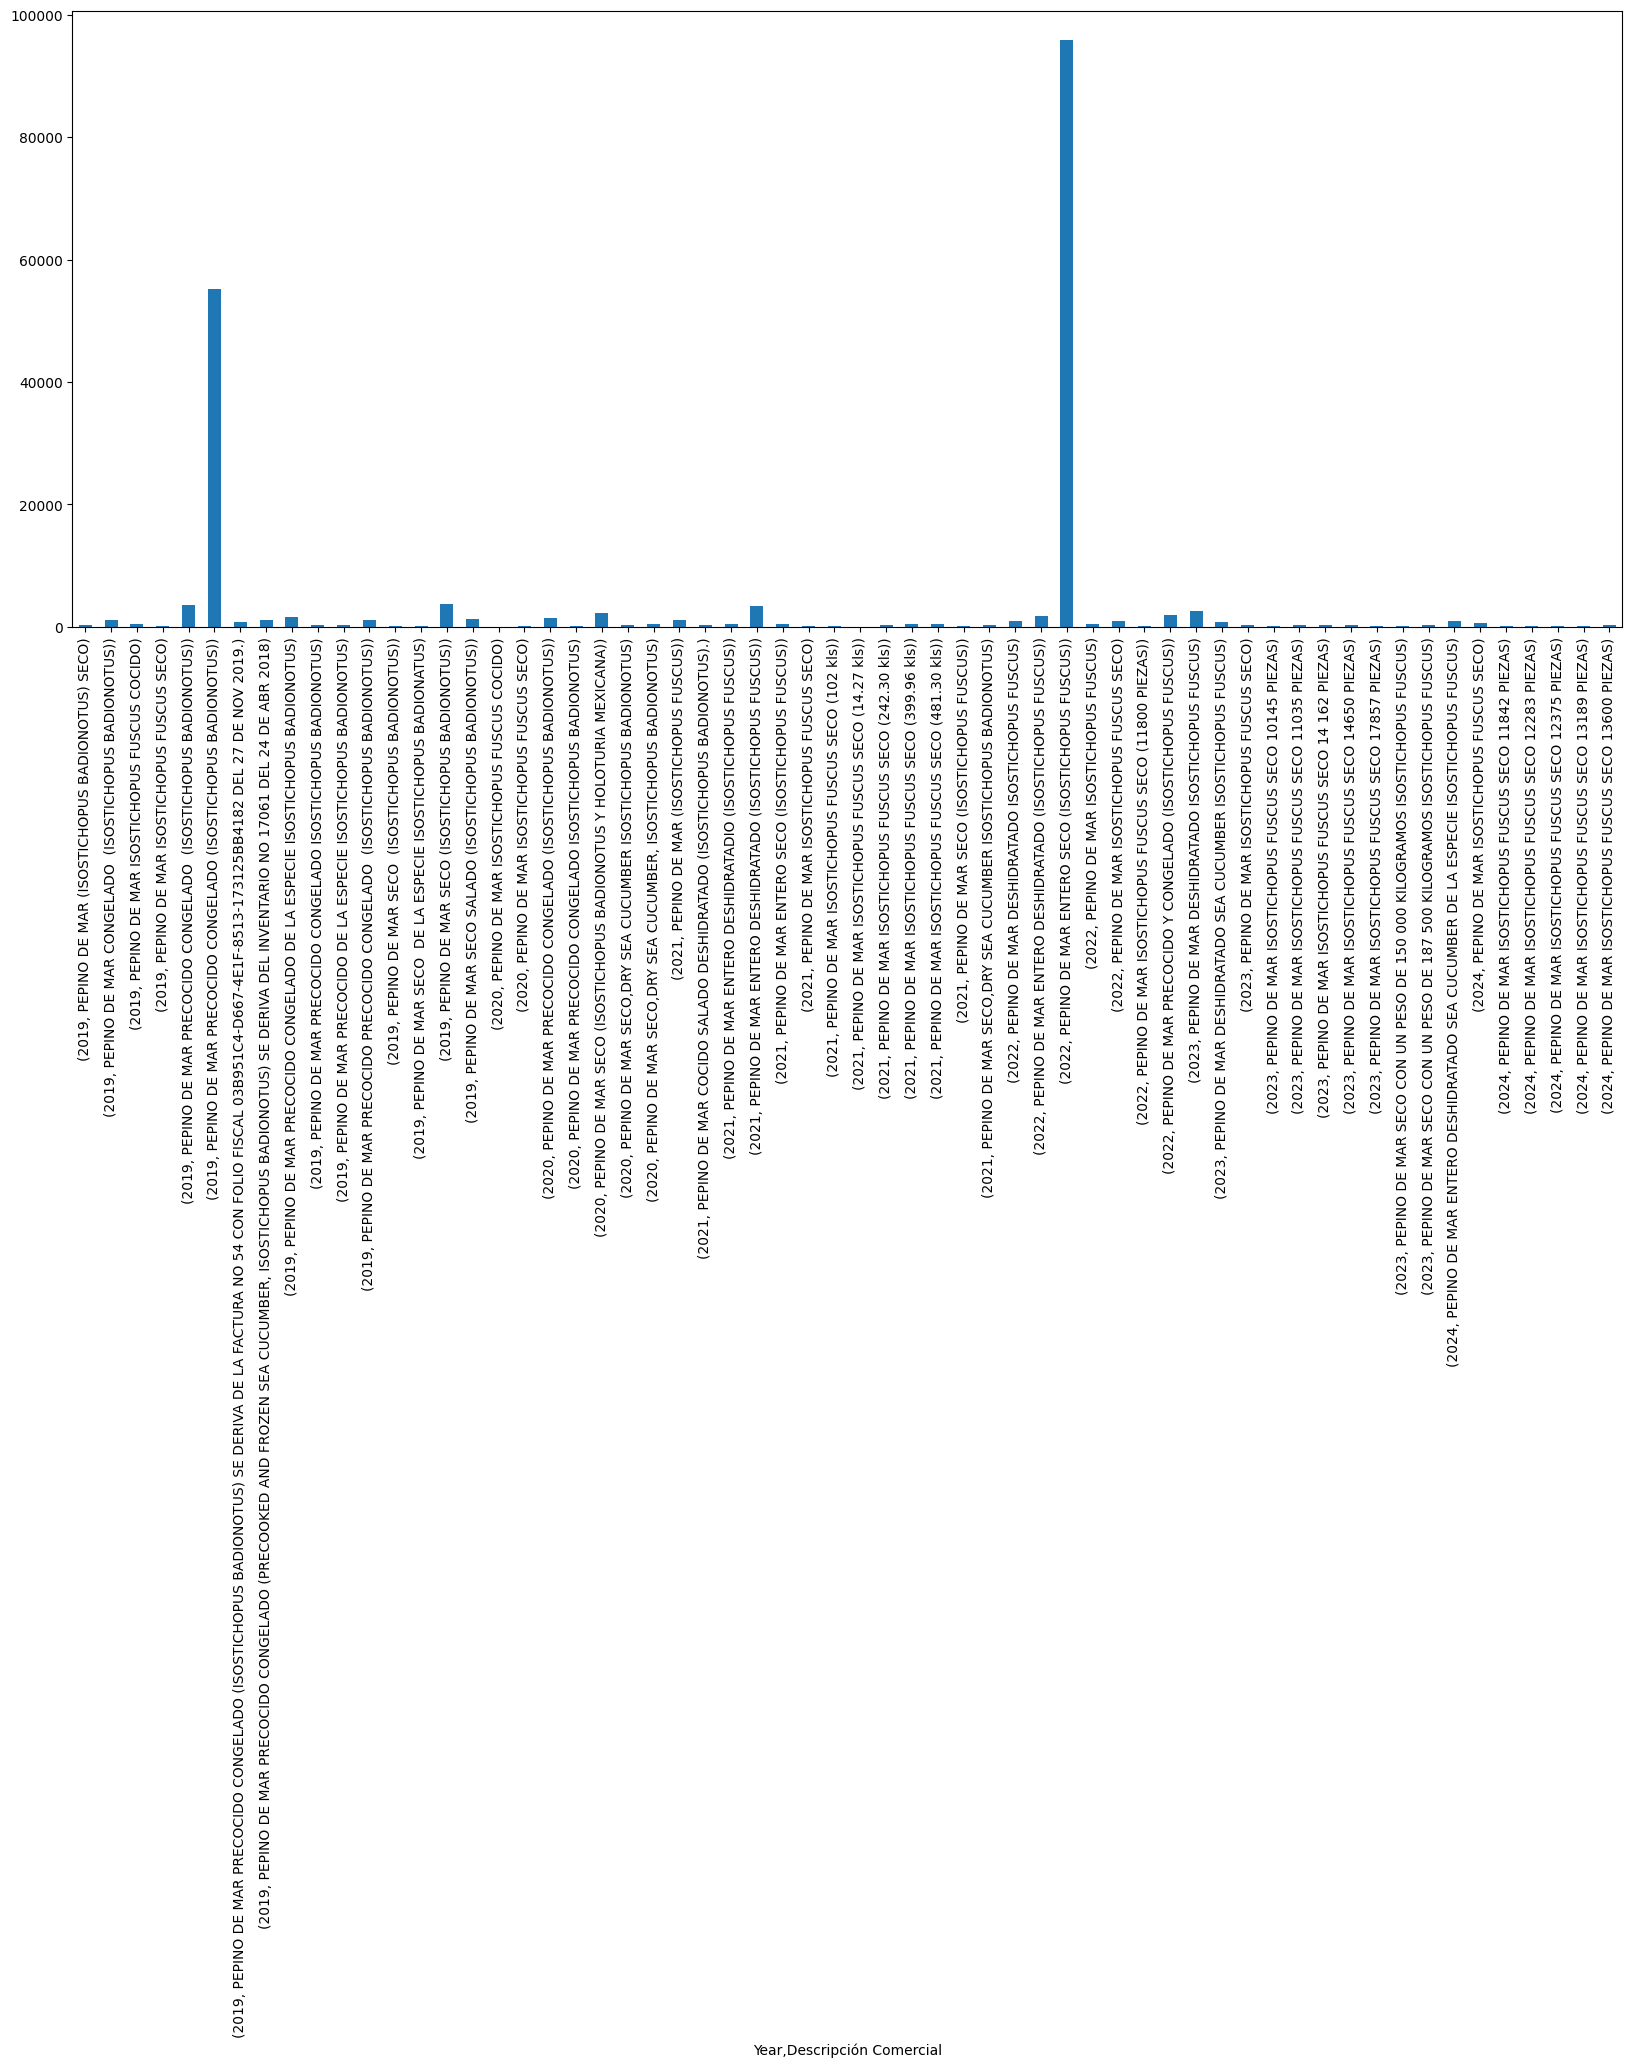

In [17]:
pepinocafe = df.loc[df['Descripción Comercial'].str.contains('ISOSTICHOPUS')]
print(pepinocafe.shape)

datosagraficar = pepinocafe.groupby(['Year','Descripción Comercial'])['Qty 1'].sum()
fig = plt.figure(figsize = (20,8))
datosagraficar.plot(kind="bar")

                 País Destino      Qty 1
3              ESTADOS UNIDOS  402884.01
4                   HONG KONG  280072.27
0                      CANADÁ    6180.00
2               COREA DEL SUR    5340.71
5                       JAPÓN    3955.00
1                       CHINA    3907.00
7  TAIWÁN, PROVINCIA DE CHINA    1320.00
6                   TAILANDIA     450.00


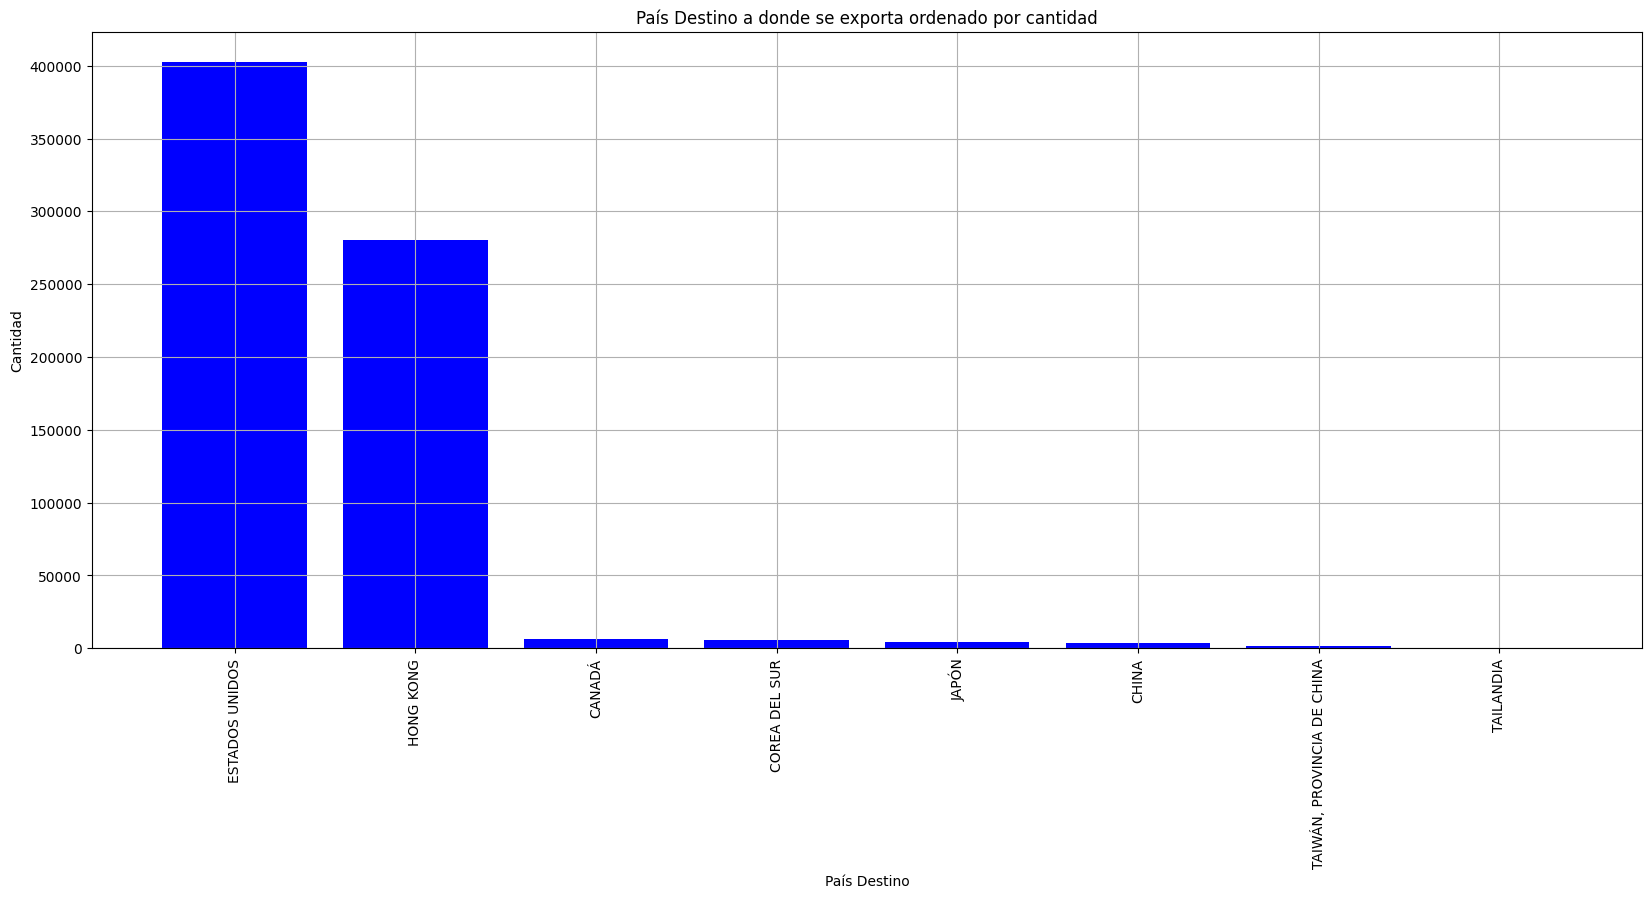

In [4]:
sum_by_paisdestino = df.groupby('País Destino')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(sum_by_paisdestino)

plt.figure(figsize = (20,8))

plt.bar(sum_by_paisdestino['País Destino'], sum_by_paisdestino['Qty 1'], color='blue')
plt.xlabel("País Destino")
plt.ylabel("Cantidad")
plt.title("País Destino a donde se exporta ordenado por cantidad")
plt.xticks(rotation=90)

plt.grid()
plt.show()

                 País Destino  U$ FOB Tot
3              ESTADOS UNIDOS  7756457.46
4                   HONG KONG  7730993.78
2               COREA DEL SUR   216277.35
5                       JAPÓN   184432.97
0                      CANADÁ    55756.86
7  TAIWÁN, PROVINCIA DE CHINA    39849.02
1                       CHINA    18120.35
6                   TAILANDIA     1821.57


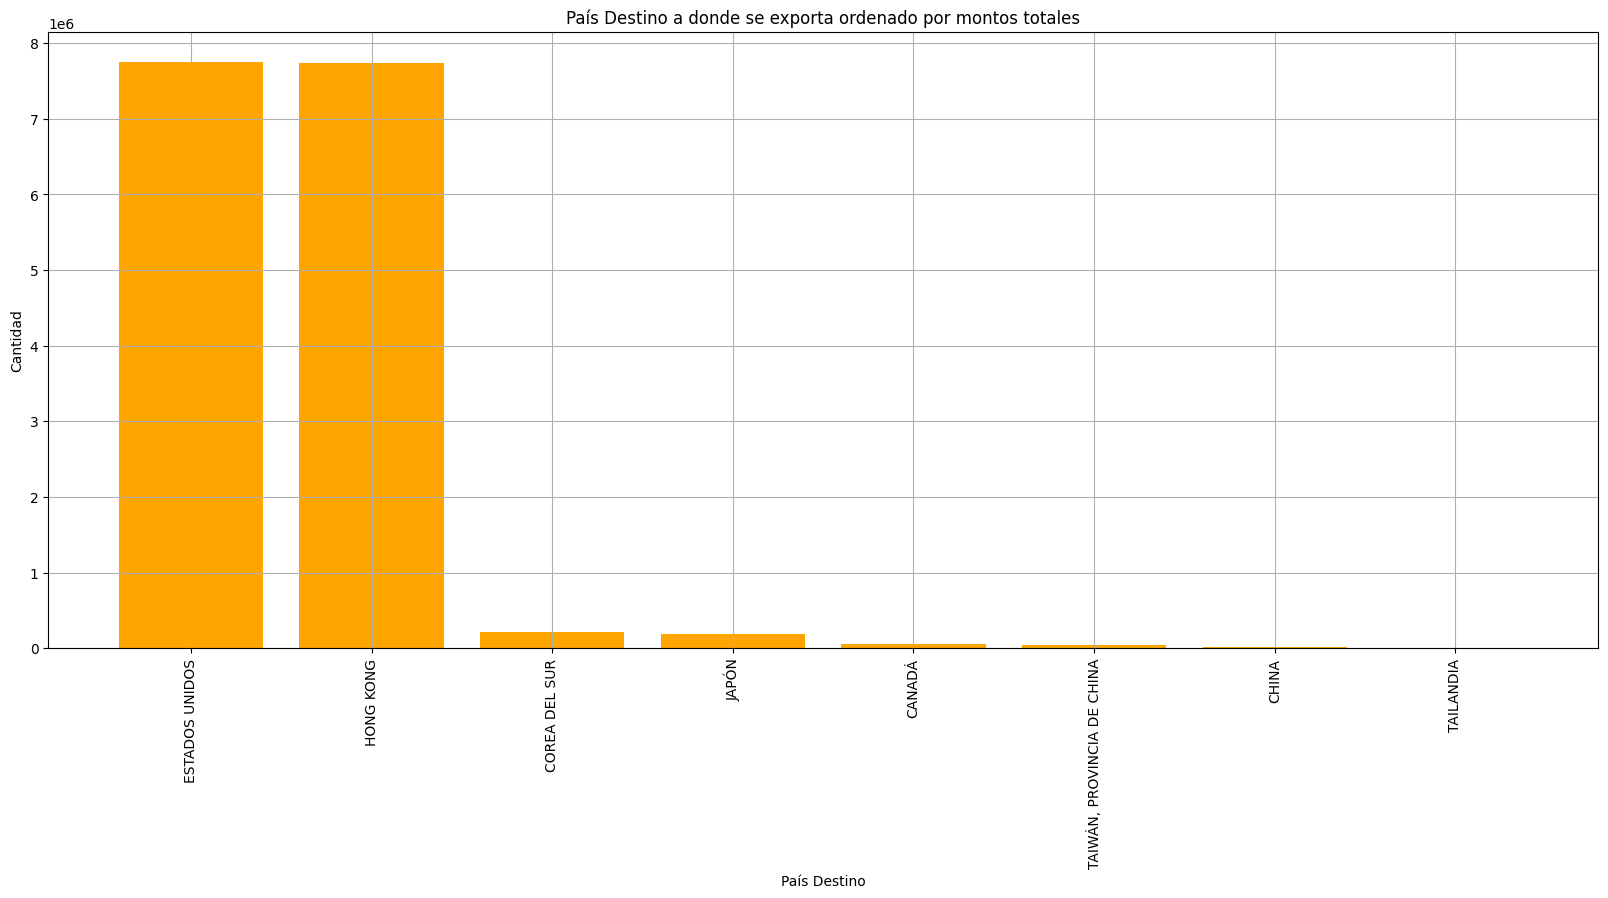

In [5]:
sum_by_paisdestino = df.groupby('País Destino')['U$ FOB Tot'].sum().reset_index().sort_values(by='U$ FOB Tot', ascending=False)
print(sum_by_paisdestino)

plt.figure(figsize = (20,8))

plt.bar(sum_by_paisdestino['País Destino'], sum_by_paisdestino['U$ FOB Tot'], color='orange')
plt.xlabel("País Destino")
plt.ylabel("Cantidad")
plt.title("País Destino a donde se exporta ordenado por montos totales")
plt.xticks(rotation=90)

plt.grid()
plt.show()

   Year      Qty 1
0  2019  242283.84
1  2020  155877.15
2  2021   90963.77
3  2022  135492.12
4  2023   60560.49
5  2024   18931.62


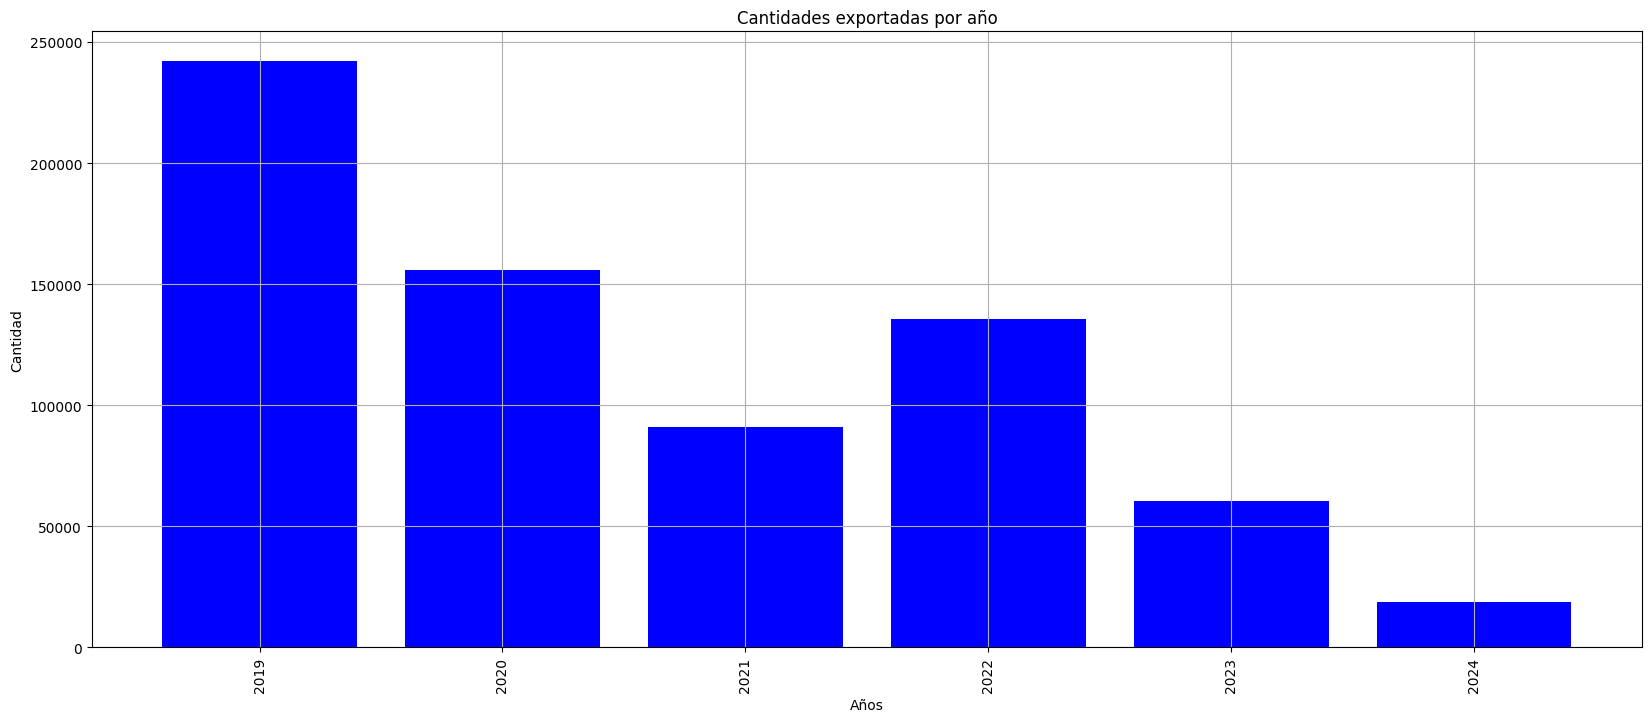

In [6]:
exportacion_por_anio = df.groupby('Year')['Qty 1'].sum().reset_index()
print(exportacion_por_anio)

plt.figure(figsize = (20,8))

plt.bar(exportacion_por_anio['Year'], exportacion_por_anio['Qty 1'], color='blue')
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.title("Cantidades exportadas por año")
plt.xticks(rotation=90)

plt.grid()
plt.show()

   Year  U$ FOB Tot
0  2019  7405301.23
1  2020  2703536.71
2  2021  1797448.66
3  2022  1535575.85
4  2023  1364479.43
5  2024  1197367.48


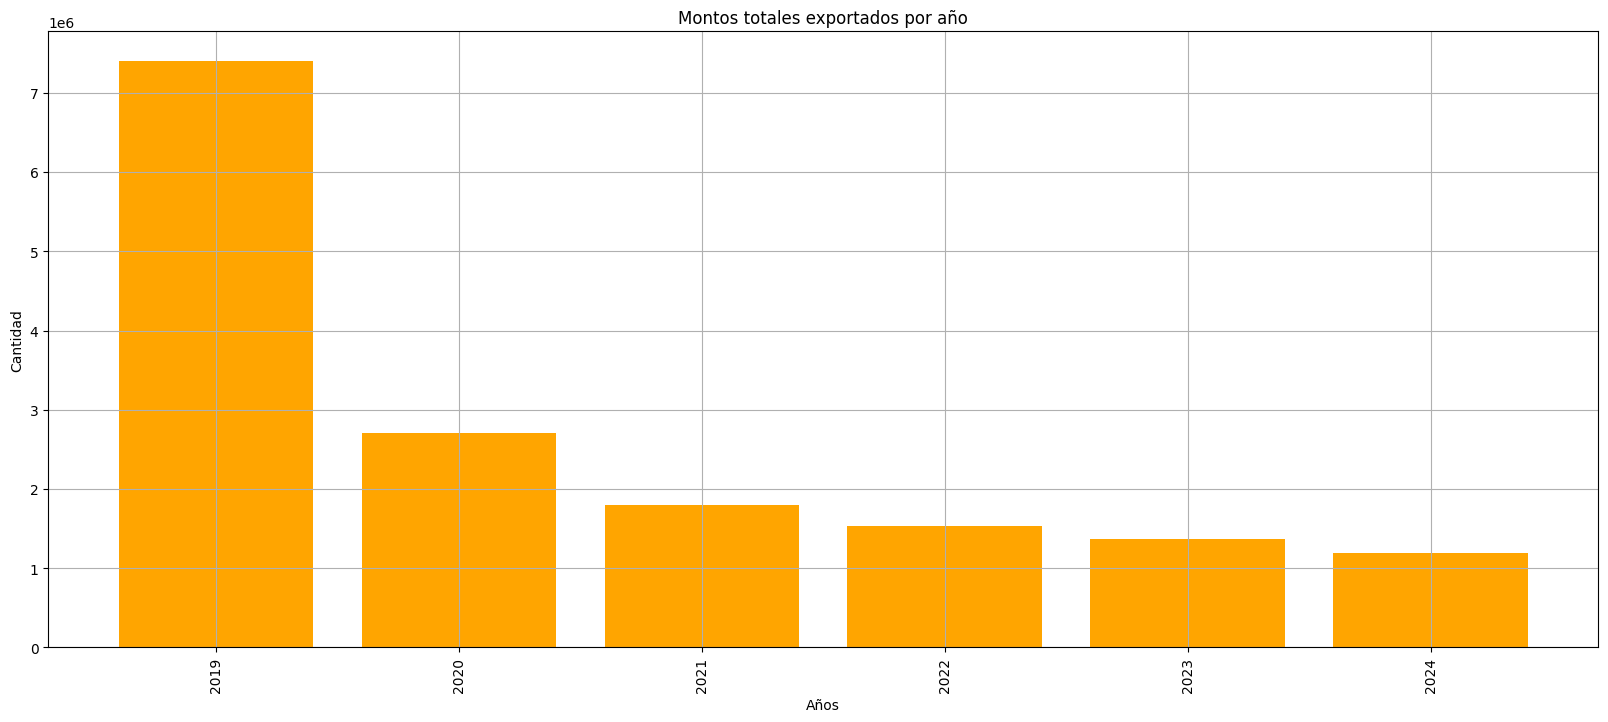

In [7]:
exportacion_por_anio = df.groupby('Year')['U$ FOB Tot'].sum().reset_index()
print(exportacion_por_anio)

plt.figure(figsize = (20,8))

plt.bar(exportacion_por_anio['Year'], exportacion_por_anio['U$ FOB Tot'], color='orange')
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.title("Montos totales exportados por año")
plt.xticks(rotation=90)

plt.grid()
plt.show()

Year  País Destino              
2019  CANADÁ                           500.00
      COREA DEL SUR                   4185.00
      ESTADOS UNIDOS                103997.57
      HONG KONG                     130386.27
      JAPÓN                           1445.00
      TAILANDIA                        450.00
      TAIWÁN, PROVINCIA DE CHINA      1320.00
2020  CANADÁ                          2010.00
      CHINA                           1500.00
      COREA DEL SUR                    824.16
      ESTADOS UNIDOS                 91828.99
      HONG KONG                      58364.00
      JAPÓN                           1350.00
2021  CANADÁ                          1170.00
      CHINA                           2407.00
      ESTADOS UNIDOS                 36635.77
      HONG KONG                      49591.00
      JAPÓN                           1160.00
2022  CANADÁ                          2500.00
      ESTADOS UNIDOS                117666.12
      HONG KONG                      15326.00
2

<Axes: xlabel='Year,País Destino'>

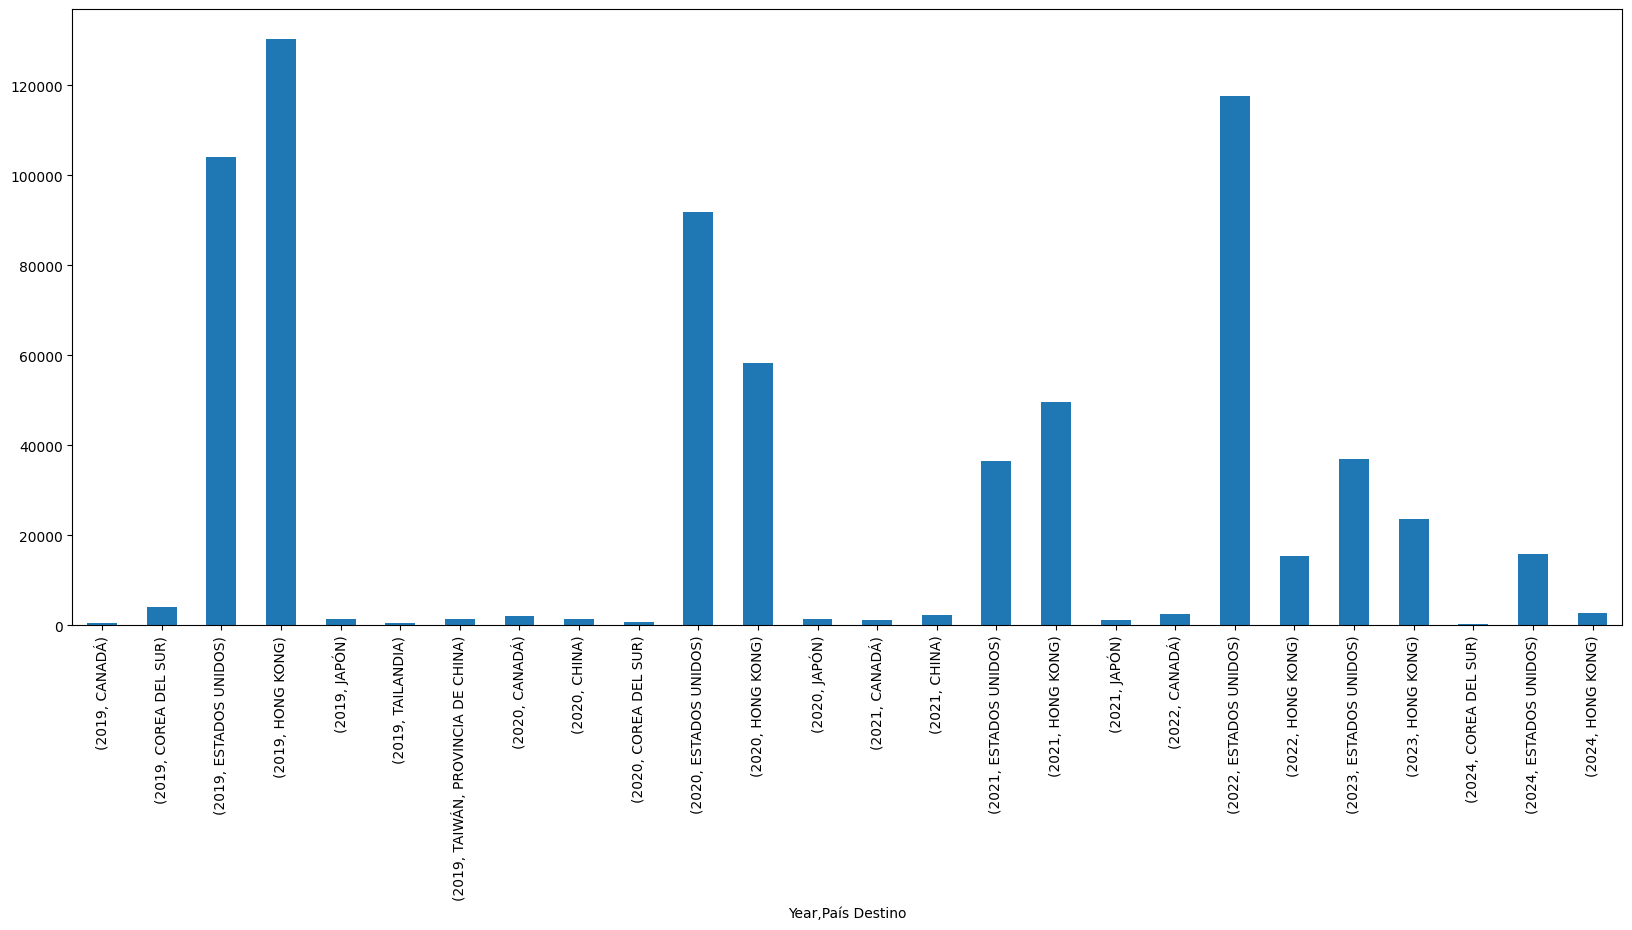

In [8]:
pais_por_anio = df.groupby(['Year','País Destino'])['Qty 1'].sum()
print(pais_por_anio)

fig = plt.figure(figsize = (20,8))
pais_por_anio.plot(kind="bar")

Year  País Destino              
2019  CANADÁ                          17499.98
      COREA DEL SUR                   62774.97
      ESTADOS UNIDOS                1901447.19
      HONG KONG                     5331333.53
      JAPÓN                           50574.97
      TAILANDIA                        1821.57
      TAIWÁN, PROVINCIA DE CHINA      39849.02
2020  CANADÁ                          19071.67
      CHINA                            1208.09
      COREA DEL SUR                   86364.67
      ESTADOS UNIDOS                1567766.60
      HONG KONG                      958817.68
      JAPÓN                           70308.00
2021  CANADÁ                          11280.20
      CHINA                           16912.26
      ESTADOS UNIDOS                 902832.34
      HONG KONG                      802873.86
      JAPÓN                           63550.00
2022  CANADÁ                           7905.01
      ESTADOS UNIDOS                1174227.24
      HONG KONG            

<Axes: xlabel='Year,País Destino'>

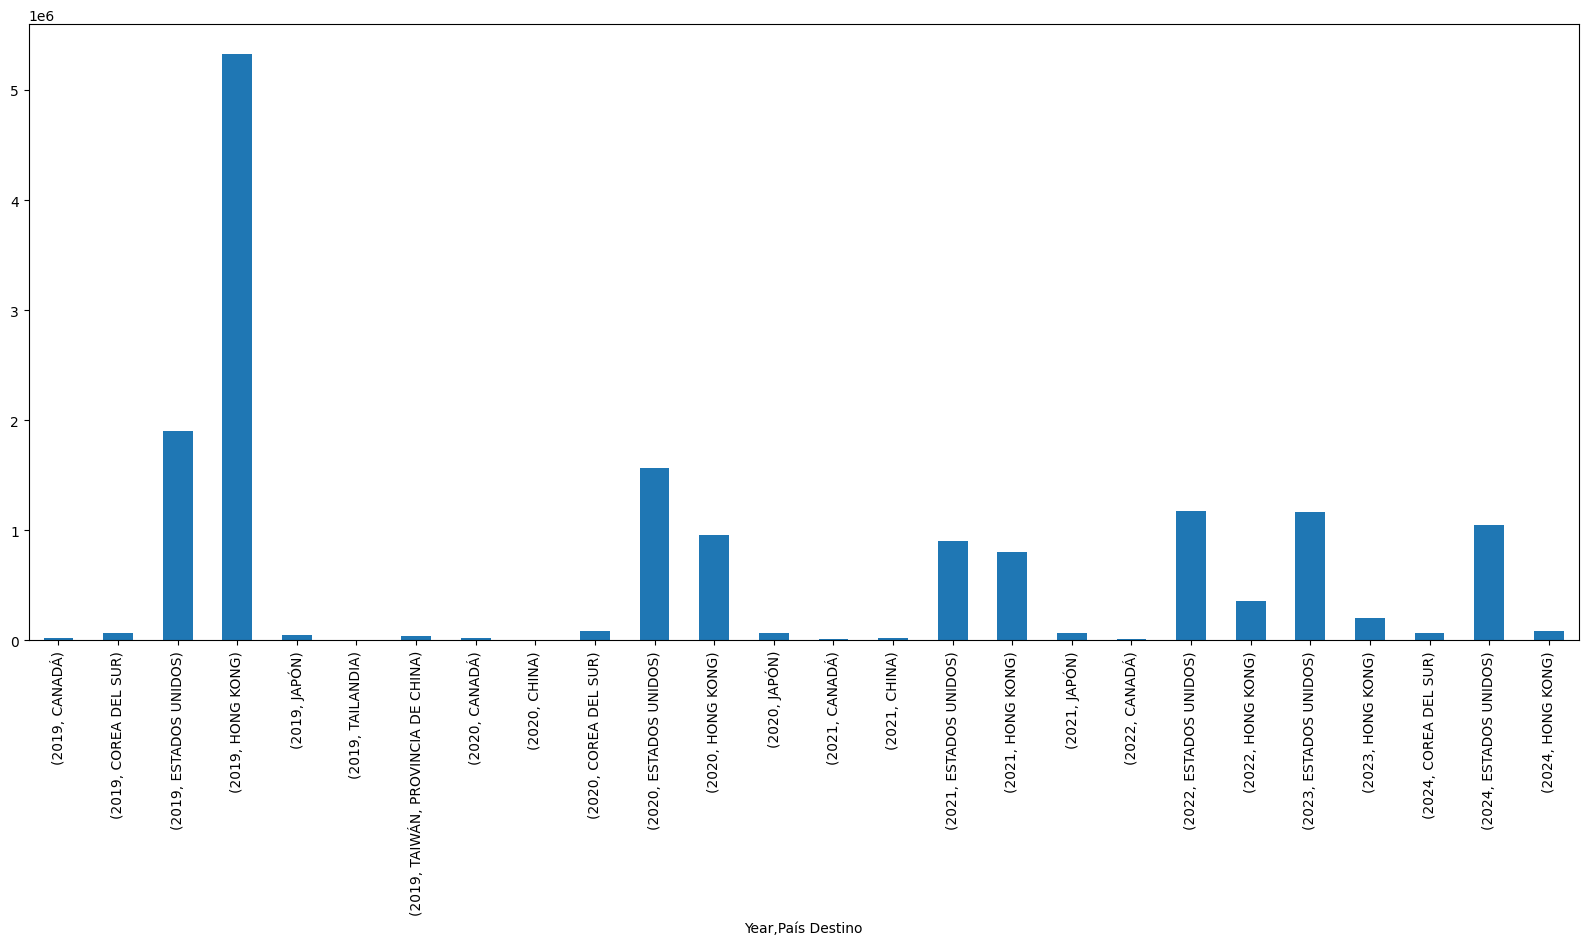

In [9]:
pais_por_anio = df.groupby(['Year','País Destino'])['U$ FOB Tot'].sum()
print(pais_por_anio)

fig = plt.figure(figsize = (20,8))
pais_por_anio.plot(kind="bar")
